## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

#### 具体实现
##### 1. 数据读取与探索

In [ ]:
from ydata_profiling import ProfileReport #官方文档表示pandas-profiling package naming was changed. To continue profiling data use ydata-profiling instead!
                                          #因此使用ydata_profiling

In [2]:

import pandas as pd

# 读取数据
data = pd.read_csv('data/github_bot_processed_data.csv')

# 调整pandas显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.max_rows', 50)      # 显示前50行

# 查看前几行数据
data.head()

,label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,NaN,26,1,5,1,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the pro...",30,3,9,6,2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0
2,Human,True,False,True,True,True,True,"Time is unimportant,\nonly life important.",103,49,1212,221,2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0
3,Bot,True,False,False,False,True,False,NaN,49,0,84,2,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0
4,Human,True,False,False,False,False,True,NaN,11,1,6,2,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0


In [4]:

# 查看数据的基本信息
print(data.info())

# 生成描述性统计信息
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB
None
       public_repos  public_gists     followers     following  text_bot_count
c

##### 2. 数据格式化处理

In [3]:

#### 处理日期、货币和百分比格式
# 示例：转换某列为日期格式
data['created_at'] = pd.to_datetime(data['created_at'])

# 示例：将货币格式化为千分位
data['salary'] = [f"${x:,.2f}" for x in data['salary']] if 'salary' in data else None

# 示例：将百分比格式化
data['conversion_rate'] = [f"{x:.2%}" for x in data['conversion_rate']] if 'conversion_rate' in data else None

##### 3. 对数变换

In [4]:
import numpy as np
# 对数变换
for col in ['public_repos', 'public_gists', 'followers', 'following']:
    if col in data.columns:
        data[f'log_{col}'] = np.log1p(data[col])  # log1p避免log(0)的问题

# 查看变换效果
print(data[['public_repos', 'log_public_repos']].head())

   public_repos  log_public_repos
0            26          3.295837
1            30          3.433987
2           103          4.644391
3            49          3.912023
4            11          2.484907


#### 4. Matplotlib绘制图表

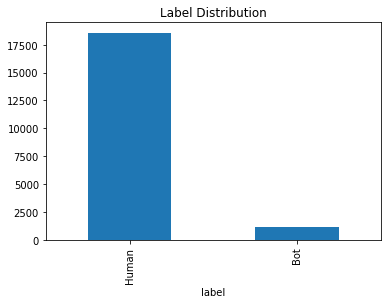

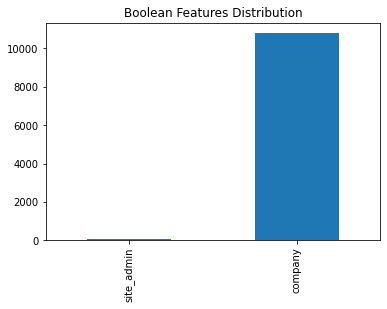

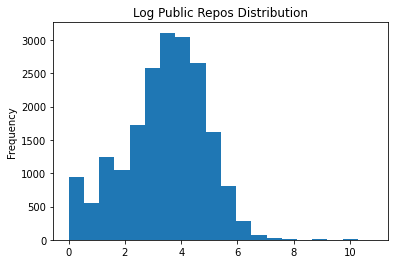

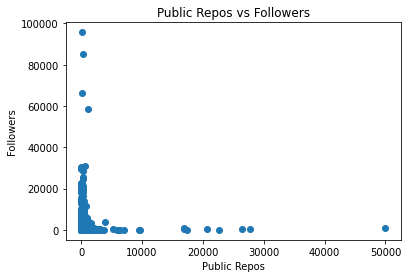

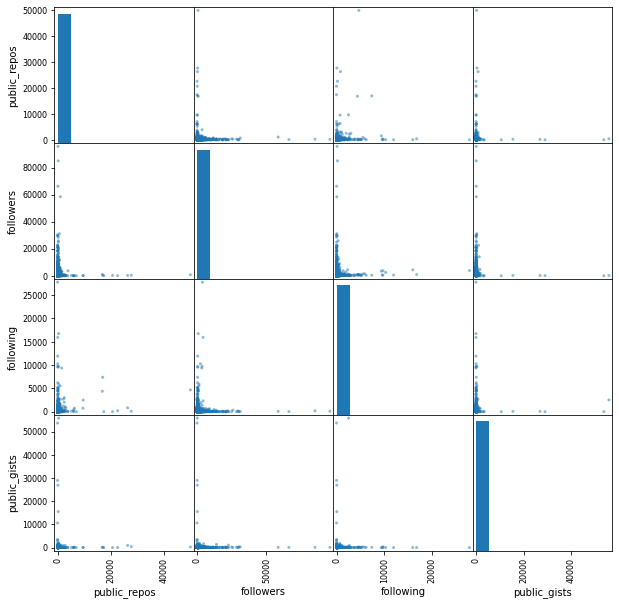

In [7]:

import matplotlib.pyplot as plt

# 条形图：label列的类别分布
data['label'].value_counts().plot(kind='bar', title='Label Distribution')
plt.show()

# 堆积柱状图：多个布尔特征的分布
bool_features = ['site_admin', 'company']  # 根据实际特征选择
data[bool_features].astype(int).sum().plot(kind='bar', stacked=True, title='Boolean Features Distribution')
plt.show()

# 直方图：log_public_repos分布
data['log_public_repos'].plot(kind='hist', bins=20, title='Log Public Repos Distribution')
plt.show()

# 散点图：public_repos vs. followers
plt.scatter(data['public_repos'], data['followers'])
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 散点矩阵
from pandas.plotting import scatter_matrix

scatter_features = ['public_repos', 'followers', 'following', 'public_gists']
scatter_matrix(data[scatter_features], figsize=(10, 10))
plt.show()

##### 5. Seaborn绘制图表

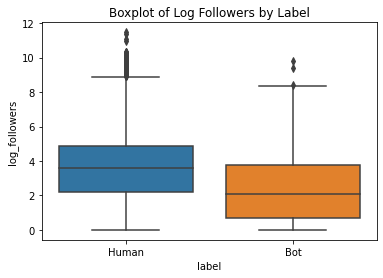

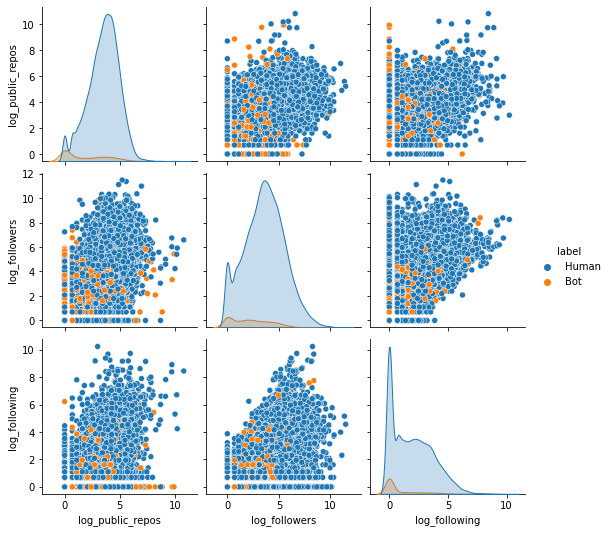

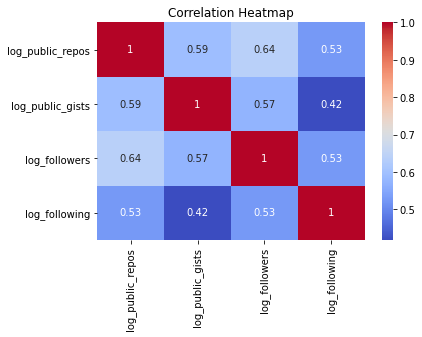

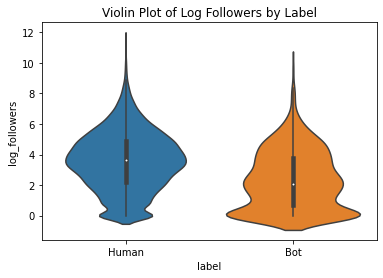

In [8]:

import seaborn as sns

# 箱线图：label vs log_followers
sns.boxplot(x='label', y='log_followers', data=data)
plt.title('Boxplot of Log Followers by Label')
plt.show()

# 成对图：不同特征的关系
sns.pairplot(data, vars=['log_public_repos', 'log_followers', 'log_following'], hue='label')
plt.show()

# 热图：特征相关性
correlation_features = ['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']
sns.heatmap(data[correlation_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 小提琴图：label vs log_followers
sns.violinplot(x='label', y='log_followers', data=data)
plt.title('Violin Plot of Log Followers by Label')
plt.show()


##### 6. 生成交互式报告

In [5]:

# 生成报告
profile = ProfileReport(data, title='Data Profiling Report', explorative=True)

# 保存报告
profile.to_file("data_profiling_report.html")


Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 369.41it/s]
